<a href="https://colab.research.google.com/github/ElifCerenGok/CL_papers/blob/main/CL_Papers_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Continiual Learning Through Synaptic Intelligence**

**Biological information about neurons:**

In real (biological) synapses, having complex structure benefits to memory consolidation.

**Summary:**

In our model, the synaptic state tracks the past and current parameter value, and maintains an online estimate of the synapse’s “importance” toward solving problems encountered in the past. Our importance measure can be computed efficiently and locally at each synapse during training, and represents the local contribution of each synapse to the change in the global loss. 

There are 3 ways to prevent forgetting: 

**1. Architectural approaches:** Freezing certain weights so that they stay exactly same.

**2. Functional approaches:** Predictions of previous task's network and current task's network encouraged to be similar when applied to data from the new task by using knowledge distillation.

**3. Structural approaches:** Involves penalties on parameters to force them to change less while learning the new task. 

Synaptic Intelligence is in the category of 3rd.

We developed a class of algorithms which keep track of an importance measure ωμk which reflects past credit for improvements of the task objective Lμ for task μ to individual synapses θk.

<p align="center">
<img src="https://github.com/ElifCerenGok/CL_papers/blob/main/images/SI.png?raw=true" width=450>
</p>

Here in this equation the second term represents the contributes the amount gk(t) δk(t) to the change in total loss.

The ωµk now have an intuitive interpretation as the parameter specific contribution to changes in the total loss.

In practice, we can approximate ωµk online as the running sum of the product of the gradient gk(t) = ∂L ∂θk with the parameter update θ 0k(t) = ∂θk ∂t . For batch gradient descent with an infinitesimal learning rate, ωµk can be directly interpreted as the per-parameter contribution to changes in the total loss.

The importance of a parameter θk for a single task is determined by two quantities: 1) how much an individual parameter contributed to a drop in the loss ωνk over the entire trajectory of training (cf. Eq. 3) and 2) how far it moved ∆νk ≡ θk(tν) − θk(tν−1).

**Difference between EWC and SI:**

EWC trains the whole parameters for Task 1 then decides which parameter is important. 

SI decides which parameter is important during trainig of Task1 by looking the change in the total loss(I think this includes previous loss) with respect to change in the parameters.

SI is very similar to Online EWC but feature importance measure w that is calculated during the stochastic gradient descent as opposed to Fisher information matrix which need to be calculated seperately.



### **Overcoming catastrophic forgetting in neural networks**

PNAS2017 

The aim of their method: Constraining important parameters stay close to their old values. 

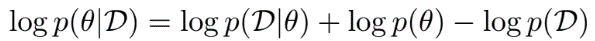

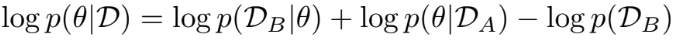
The main formula can be summarized as:
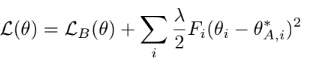

One founding of their analysis: 
They emphasize that similar tasks have similar Fisher matrices. The paramaters are shared through the whole network.

Dissimilar tasks have dissimilar Fisher matrices in the earlier layers but they start to have similar values at the end of the network layers. Meaning the network starts to allocate seperate capacity for two tasks.

The below figure shows this analysis.

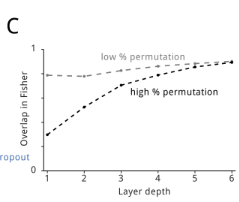


### **Architecure Matters in Continual Learning**

Submitted to: ICRL 2023 (arxiv)

**Keypoints:**
 * As width increases the forgetting decrease
 * Batch normalization can significantly improve
the learning accuracy 
 * Adding skip connections to CNNs does not change 
performance 
 * Types of pooling layers have effect on CNNs for CL


### **Continual Backprop: Stochastic Gradient Descent with Persistent Randomness**

Submitted to: ICRL 2022 (arxiv)

**Keypoints:**
* SGD is not sufficient for Continual Learning case (especiall for online learning) where the training is not done only once
* In standar case backprop is done after every mini batch but in their study it is done after every data poing (because
it is an online learnin case)
* The most common way to keep the weight distribution close to the initial distribution are L2 regularization and BatchNorm.
* Initialization of small weights is important for learning 
Their approach in very short:
* In their approach they replace low utility features(feature refers to a hidden unit the network) with random features.


### **Barlow Twins**

PMLR 2021

1. Image comes. 
2. 2 distorted version of an image is created. (these 
distortions are augmentations) 
3. Then the embedddings of 2 distorted versions are created within the encoder part. (1024 x 1) This process is done for the whole batch.(64 x 1024)
4. Then correlation confusion matrix is calculated. (1024 x 1024) We expect 2 distorted versions of an image similar to each other while it is dissimilar to other images in the same batch. 

The findings they found is: 
*Small batch size works better when they compare it with the literature.(optimal is 1024)
* They require higher embedding space. (the higher is the better)

### **Re-evaluating Continual Learning Scenarios: A Categorization and Case for Strong Baselines**

NIPS Workshop 2018

**Keypoints:**

Class incremental Split MNIST EWC result: 19.80 

Class incremental Split MNIST Online EWC result: 19.77 

Class incremental Split MNIST SI result: 19.67 

Class incremental Split MNIST LWF result: 24.17

 L2 regularization also requires hyperparameter tuning

Permutation datasets are easier than split datasets

Since task boundaries are not known regularization methods are hard to apply
Formulation of EWC: 
Formulation of Online EWC:

Choosing very high and very low regularization coefficients yields worst results there is an optimum point.

Lr for Adam: 0.001 They also used Adagrad and SGD.

Random initialization of weights are better than zero initialization.

Online EWC makes difference in task incremental learning.



### **A simple baseline that questions the use of pretrained-models in continual learning **

Arxiv 2022

From the Related Work part:
* Large amount of data at initial task
* Self- supervision helps to reduce catastrophic forgetting.
Their method:
They dont train anything.
* They use ViT-B/16
* There is no training they only forward pass the classes through the model to 
extract features.

```
Class 1 ------->                       [0.5,0.8,1,1.3,12.4] class 1 image 1
Class 2 -------> Pretrained big model  [0.9,0.4,3,1.8,11] class 1 image 2 
Class 3 ------->                                            
                                        [0.3,0.1,0.4,0.5,0.6] class 2 image 1
                                        [0.8,0.1,0.3,0.4,0.5] class 2 image 2 

mean feature for Class 1 : [0.7,0.6,2,1.55,12] (Matrix A)
mean feature for Class 2 : [0.5,0.1,0.35,0.45,0.55] (Matrix B)
```


...
At test time unknown class arrives and forward pass through the model and get a 
extracted feature like: [0.6,0.7,2,1.4,11.8] (Matrix C)
Then they compute the distance between Matrix C and MAtrix A and Matrix C and 
Matrix B and make a classification based on the smallest ditance. 


### **Learning without Forgetting**

NIPS 2017

Implementation detail: 
They use weight decay = 0.0005 in SGD.

Higher T increases the weigth of smaller logit values and encourages the network to better encode.

They choose T= 2 based on grid search.

MatConvNet SGD with momentum=0.9 with dropout in fc layers.

For initialization of network they use Xavier initalizaztion.

They run experiments 3 times.

